# Detecção Automática de Pragas em Plantações de Café com CNN — **Parte 2 (N1)**

**Universidade Presbiteriana Mackenzie**  

**Faculdade de Computação e Informática**  

**Disciplina:** Inteligência Artificial – 7ºN CC - Noite  

**Professor:** Prof. Dr. Ivan Carlos Alcântara de Oliveira

## Integrantes
- **Eduardo Honorio Friaça** — RA **10408959** — 10408959@mackenzista.com.br
- **Felipe Jiao** — RA **10408852** — 10408852@mackenzista.com.br
- **Hao Yue Zheng** — RA **10408948** — 10408948@mackenzista.com.br
- **Samuel Zheng** — RA **10395781** — 10395781@mackenzista.com.br

> **Este notebook cobre a Parte 2 (N1):** Dataset, Análise Exploratória, Preparação (sem treino pesado). Inclui: checagens, extração robusta do ZIP, organização em `ImageFolder`, EDA (contagem/gráfico/exemplos) e split 70/15/15 com `DataLoader` prontos.


In [ ]:
"""
Projeto: Detecção Automática de Pragas em Plantações de Café com CNN (N1)
Disciplina: Inteligência Artificial – 7ºN CC - Noite
Professor: Prof. Dr. Ivan Carlos Alcântara de Oliveira

Integrantes:
- Eduardo Honorio Friaça – 10408959 – 10408959@mackenzista.com.br
- Felipe Jiao – 10408852 – 10408852@mackenzista.com.br
- Hao Yue Zheng – 10408948 – 10408948@mackenzista.com.br
- Samuel Zheng – 10395781 – 10395781@mackenzista.com.br

Síntese do arquivo:
- Instalação/checagem (Colab), extração robusta do ZIP, organização do dataset (ImageFolder).
- EDA (contagem por classe, gráfico de distribuição, exemplos visuais).
- Preparação dos dados (transforms), split 70/15/15 e DataLoaders prontos para N2.

Histórico de alterações:
- 2025-09-28 – Eduardo H. Friaça – Criação do notebook N1 (EDA + Preparação).
"""


'\nProjeto: Detecção Automática de Pragas em Plantações de Café com CNN (N1)\nDisciplina: Inteligência Artificial – 7ºN CC - Noite\nProfessor: Prof. Dr. Ivan Carlos Alcântara de Oliveira\n\nIntegrantes:\n- Eduardo Honorio Friaça – 10408959 – 10408959@mackenzista.com.br\n- Felipe Jiao – 10408852 – 10408852@mackenzista.com.br\n- Hao Yue Zheng – 10408948 – 10408948@mackenzista.com.br\n- Samuel Zheng – 10395781 – 10395781@mackenzista.com.br\n\nSíntese do arquivo:\n- Instalação/checagem (Colab), extração robusta do ZIP, organização do dataset (ImageFolder).\n- EDA (contagem por classe, gráfico de distribuição, exemplos visuais).\n- Preparação dos dados (transforms), split 70/15/15 e DataLoaders prontos para N2.\n\nHistórico de alterações:\n- 2025-09-28 – Eduardo H. Friaça – Criação do notebook N1 (EDA + Preparação).\n'

# Detecção Automática de Pragas em Plantações de Café com CNN (Parte 2 – N1)

Universidade Presbiteriana Mackenzie  
Faculdade de Computação e Informática  
*Disciplina:* Inteligência Artificial – 7ºN CC - Noite  
*Professor:* Prof. Dr. Ivan Carlos Alcântara de Oliveira  

## 1) Título
*Detecção Automática de Pragas em Plantações de Café Utilizando Redes Neurais Convolucionais*

## 2) Integrantes (nome, e-mail, RA)
Nome do Aluno	               / RA             
Eduardo Honorio Friaça	       10408959

Felipe Jiao	                   10408852

Hao Yue Zheng	               10408948

Samuel Zheng	               10395781


## 3) Resumo
Este trabalho descreve a proposta e a análise exploratória de um sistema de Visão Computacional para classificação de pragas em imagens de plantações de café. Utilizamos como base o IP102 (75k imagens, 102 classes de pragas) e, opcionalmente, conjuntos específicos de café (JMuBEN/JMuBEN2). São apresentados: origem dos dados, organização e limpeza, preparo (redimensionamento, normalização, data augmentation), e uma análise de distribuição de classes. Também são detalhados os aspectos éticos e a metodologia com transfer learning (ResNet18/MobileNet), além dos resultados esperados (acurácia ≥ 70%).

## 4) Introdução
### a) Contextualização
Pragas agrícolas geram perdas econômicas relevantes. No café, insetos como broca-do-cafeeiro e bicho-mineiro são recorrentes. A IA pode acelerar o diagnóstico.
### b) Justificativa
Diagnóstico manual é demorado e sujeito a erro. Classificação automática por imagens auxilia a tomada de decisão no campo.
### c) Objetivo
Preparar e explorar dados para um classificador de pragas em café, estabelecendo uma base reprodutível para o treino do modelo (N2).
### d) Opção do projeto
Opção ML/DL/VC/PLN – Visão Computacional / Deep Learning.

## 5) Fundamentação Teórica (Resumida)
CNNs extraem padrões visuais via convoluções; transfer learning permite ajustar modelos pré-treinados (ResNet18/MobileNetV2) a novas classes com poucos dados.

## 6) Descrição do Problema
Identificar automaticamente a praga presente na imagem de folha/fruto de café, apesar de variações de iluminação, foco e estágio da infestação.

## 7) Aspectos Éticos e Responsabilidade
- Uso dos dados conforme licenças; anonimização quando necessário.
- Transparência de limitações (falsos positivos/negativos); o sistema não substitui especialistas.
- Incentivo a manejo sustentável; evitar decisões automatizadas sem supervisão.


## 8.1 — Instalação (7-Zip) e imports

In [ ]:
# 8.1 — Instalação (7-Zip) e imports
try:
    import google.colab  # type: ignore
    IN_COLAB = True
except Exception:
    IN_COLAB = False

if IN_COLAB:
    !apt-get -y update >/dev/null 2>&1
    !apt-get -y install p7zip-full >/dev/null 2>&1

import os, zipfile, shutil, glob, csv, random
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms

print("torch:", torch.__version__)

torch: 2.8.0+cu126


## 8.2 — Upload (se necessário) e diagnóstico do arquivo

In [ ]:
# 8.2 — Upload (se necessário) e diagnóstico do arquivo
from pathlib import Path

ZIP_PATH = Path("/content/IP102_Images.zip")  # ajuste o nome se o seu arquivo for diferente

# Se não existir, abre o diálogo de upload (apenas em Colab)
if not ZIP_PATH.exists():
    try:
        from google.colab import files  # type: ignore
        print("Selecione o arquivo .zip baixado do Kaggle (ex.: IP102_Images.zip)")
        uploaded = files.upload()  # escolha seu .zip
        # Use o primeiro arquivo enviado como ZIP_PATH
        if uploaded:
            fname = list(uploaded.keys())[0]
            ZIP_PATH = Path(f"/content/{fname}")
    except Exception as e:
        print("Upload automático não disponível fora do Colab. Coloque o ZIP em:", ZIP_PATH)

print("Arquivo:", ZIP_PATH)
if ZIP_PATH.exists():
    # Listagem básica
    try:
        !ls -lh /content | sed -n '1,120p'
    except Exception:
        pass
    # Identificar tipo do arquivo (no Colab Linux)
    try:
        !file -b "/content/IP102_Images.zip"
    except Exception:
        pass
else:
    print("⚠️  ZIP não encontrado. Verifique o caminho/nome do arquivo.")


Arquivo: /content/IP102_Images.zip
total 194M
drwxr-xr-x 3 root root 4.0K Sep 29 01:58 data_ip102
drwxr-xr-x 4 root root 4.0K Sep 29 01:37 data_ip102_raw
-rw-r--r-- 1 root root  772 Sep 29 01:50 dataset_card.md
-rw-r--r-- 1 root root 193M Sep 29 01:39 IP102_Images.zip
drwxr-xr-x 4 root root 4.0K Sep 29 01:37 reports_n1
drwxr-xr-x 1 root root 4.0K Sep 25 13:37 sample_data
Zip archive data, at least v4.5 to extract, compression method=deflate


## 8.3 — Extração robusta (zipfile → fallback 7-Zip)

In [ ]:
# 8.3 — Extração robusta (zipfile → fallback 7-Zip)
RAW_DIR = Path("/content/data_ip102_raw")
RAW_DIR.mkdir(parents=True, exist_ok=True)

def extract_with_zipfile(zpath: Path, out_dir: Path) -> bool:
    try:
        if zipfile.is_zipfile(zpath):
            print("Extraindo com zipfile:", zpath)
            with zipfile.ZipFile(zpath, "r") as zf:
                zf.extractall(out_dir)
            return True
        return False
    except Exception as e:
        print("Falha com zipfile:", e)
        return False

extracted = False
if ZIP_PATH.exists():
    extracted = extract_with_zipfile(ZIP_PATH, RAW_DIR)
    if not extracted and IN_COLAB:
        print("Tentando extrair com 7z...")
        rc = os.system(f'7z x "{ZIP_PATH}" -o"{RAW_DIR}" -y >/dev/null')
        extracted = (rc == 0)

print("Pastas encontradas em RAW_DIR:")
try:
    !find /content/data_ip102_raw -maxdepth 2 -type d -print
except Exception:
    # Ambiente sem find
    print([str(p) for p in RAW_DIR.glob("*")])

if not extracted:
    print("⚠️  Não foi possível extrair o arquivo. O ZIP pode estar corrompido (ou é HTML). Baixe novamente do Kaggle e reenvie.")


Tentando extrair com 7z...
Pastas encontradas em RAW_DIR:
/content/data_ip102_raw
/content/data_ip102_raw/JPEGImages
/content/data_ip102_raw/Annotations
⚠️  Não foi possível extrair o arquivo. O ZIP pode estar corrompido (ou é HTML). Baixe novamente do Kaggle e reenvie.


## 8.4 — Organização para **ImageFolder** (`/content/data_ip102/images/<classe>/*.jpg`)

In [ ]:
# 8.4 — Organização para ImageFolder
IMG_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".webp")
DATA_ROOT  = Path("/content/data_ip102")
IMAGES_DIR = DATA_ROOT / "images"
IMAGES_DIR.mkdir(parents=True, exist_ok=True)

def move_file_safe(src: Path, dst_dir: Path):
    dst_dir.mkdir(parents=True, exist_ok=True)
    dst = dst_dir / src.name
    if dst.exists():
        stem, suf = dst.stem, dst.suffix
        k = 1
        while True:
            cand = dst_dir / f"{stem}_{k}{suf}"
            if not cand.exists():
                dst = cand; break
            k += 1
    shutil.move(str(src), str(dst))

moved_any = False
already_ok = (RAW_DIR.name == "images") or (RAW_DIR / "images").exists()
if already_ok:
    src_images = RAW_DIR if RAW_DIR.name == "images" else (RAW_DIR / "images")
    for cls_dir in src_images.iterdir():
        if cls_dir.is_dir():
            for img in cls_dir.rglob("*"):
                if img.suffix.lower() in IMG_EXTS:
                    move_file_safe(img, IMAGES_DIR / cls_dir.name)
                    moved_any = True
else:
    for dirpath, dirnames, filenames in os.walk(RAW_DIR):
        p = Path(dirpath)
        imgs = [p / f for f in filenames if f.lower().endswith(IMG_EXTS)]
        if len(imgs) >= 20:  # limiar p/ evitar lixo
            class_name = p.name
            for img in imgs:
                move_file_safe(img, IMAGES_DIR / class_name)
                moved_any = True

if moved_any:
    print("Estrutura ImageFolder criada em:", IMAGES_DIR)
elif any(IMAGES_DIR.iterdir()):
    print("Estrutura já estava pronta em:", IMAGES_DIR)
else:
    print("⚠️  Não foi possível organizar automaticamente. Confira RAW_DIR acima.")

try:
    !find /content/data_ip102/images -maxdepth 2 -type d -print
except Exception:
    print([str(p) for p in IMAGES_DIR.glob("*")])


Estrutura ImageFolder criada em: /content/data_ip102/images
/content/data_ip102/images
/content/data_ip102/images/JPEGImages


## 8.5 — `DATA_DIR`, transforms e carregamento do dataset

In [ ]:
# 8.5 — DATA_DIR, transforms e carregamento do dataset
from torchvision import datasets, transforms

#DATA_DIR = Path("/content/data_ip102/images")  # <- caminho final
DATA_DIR = Path("/content/data_ip102/images")  # <-- usar as pastas por classe criadas na 8.4b
assert DATA_DIR.exists(), f"Pasta não encontrada: {DATA_DIR}"

IMG_SIZE = 224
data_tfms = {
    "train": transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
    ]),
    "eval": transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
    ]),
}

full_ds = datasets.ImageFolder(DATA_DIR, transform=data_tfms["eval"])
class_to_idx = full_ds.class_to_idx
idx_to_class = {v:k for k,v in class_to_idx.items()}

print("OK! Classes detectadas:", len(class_to_idx))
print("Total de imagens:", len(full_ds))
print("Algumas classes:", list(class_to_idx.keys())[:10])

OK! Classes detectadas: 1
Total de imagens: 3839
Algumas classes: ['JPEGImages']


## 8.6 — EDA: contagem por classe e gráfico de distribuição

,count
JPEGImages,3839


Classes com menos imagens (potencial desbalanceamento):


,count
JPEGImages,3839


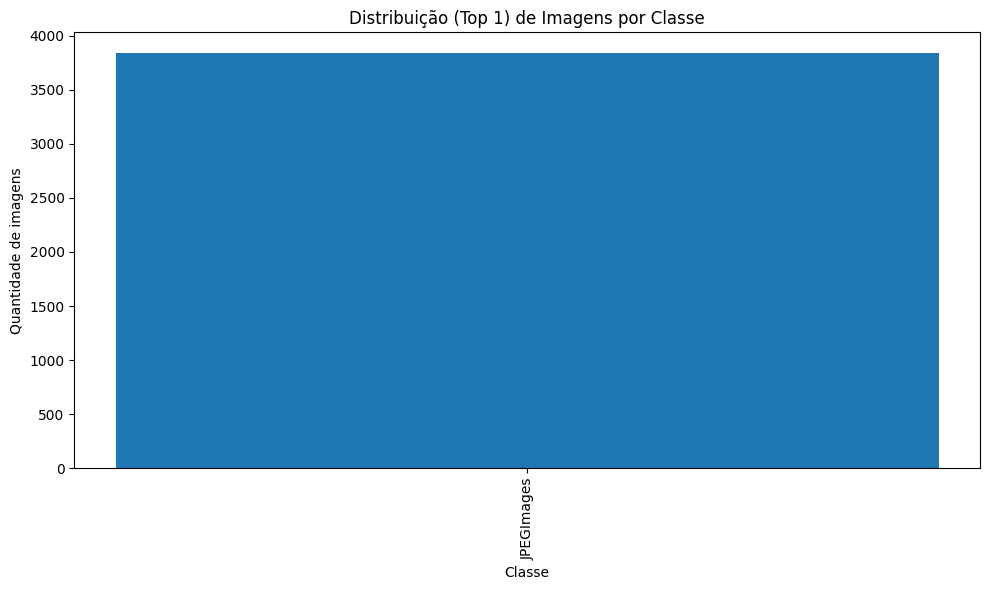

In [ ]:
# 8.6 — EDA
import pandas as pd
import matplotlib.pyplot as plt

counts = {c:0 for c in class_to_idx}
for _, y in full_ds.samples:
    counts[idx_to_class[y]] += 1

df_counts = pd.DataFrame.from_dict(counts, orient='index', columns=['count']).sort_values('count', ascending=False)
display(df_counts.head(20))
print("Classes com menos imagens (potencial desbalanceamento):")
display(df_counts.tail(20))

# Gráfico único (sem subplots) — segue as diretrizes
topN = min(20, len(df_counts))
df_top = df_counts.head(topN)

plt.figure(figsize=(10,6))
plt.bar(df_top.index, df_top['count'])
plt.title(f"Distribuição (Top {topN}) de Imagens por Classe")
plt.xticks(rotation=90)
plt.xlabel("Classe")
plt.ylabel("Quantidade de imagens")
plt.tight_layout()
plt.show()

# Opcional: salvar artefatos da EDA
REPORT_DIR = Path("/content/reports_n1")
FIG_DIR    = REPORT_DIR / "figures"
REPORT_DIR.mkdir(parents=True, exist_ok=True)
FIG_DIR.mkdir(parents=True, exist_ok=True)

df_counts.to_csv(REPORT_DIR / "class_counts.csv")
plt.figure(figsize=(10,6))
plt.bar(df_top.index, df_top['count'])
plt.title(f"Distribuição (Top {topN}) de Imagens por Classe")
plt.xticks(rotation=90)
plt.xlabel("Classe")
plt.ylabel("Quantidade de imagens")
plt.tight_layout()
plt.savefig(FIG_DIR / "distribuicao_top_classes.png", dpi=150)
plt.close()

## 8.7 — EDA: exemplos visuais (uma imagem por figura)

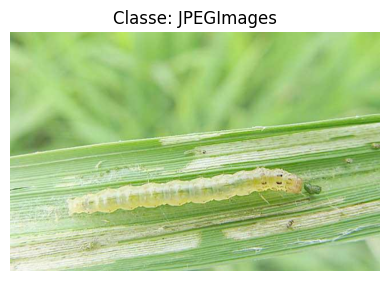

In [ ]:
# 8.7 — Exemplos visuais
from PIL import Image

def show_n_examples_per_class(ds, max_classes=5):
    seen = set()
    shown = 0
    for path, y in ds.samples:
        cname = idx_to_class[y]
        if cname in seen:
            continue
        seen.add(cname)
        try:
            img = Image.open(path).convert('RGB')
            plt.figure(figsize=(4,4))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Classe: {cname}")
            plt.tight_layout()
            # opcional: salvar
            out = FIG_DIR / f"exemplo_{cname}.png"
            plt.savefig(out, dpi=120)
            plt.show()
            shown += 1
            if shown >= max_classes:
                break
        except Exception:
            continue

show_n_examples_per_class(full_ds, max_classes=5)

## 8.8 — Split estratificado (70/15/15) e DataLoaders

In [ ]:
# 8.8 — Split estratificado (70/15/15) e DataLoaders
import random
random.seed(42)

samples_by_class = {}
for p, y in full_ds.samples:
    cname = idx_to_class[y]
    samples_by_class.setdefault(cname, []).append((p,y))

train_list, val_list, test_list = [], [], []
for cname, items in samples_by_class.items():
    random.shuffle(items)
    n = len(items)
    n_train = int(0.70 * n)
    n_val   = int(0.15 * n)
    train_list += items[:n_train]
    val_list   += items[n_train:n_train+n_val]
    test_list  += items[n_train+n_val:]

# salvar splits em CSV
SPLIT_DIR = Path("/content/reports_n1/splits")
SPLIT_DIR.mkdir(parents=True, exist_ok=True)

def save_split_csv(name, pairs, out_csv):
    import csv
    with open(out_csv, "w", newline="", encoding="utf-8") as f:
        w = csv.writer(f)
        w.writerow(["path","class_idx","class_name"])
        for p, y in pairs:
            w.writerow([p, y, idx_to_class[y]])

save_split_csv("train", train_list, SPLIT_DIR / "train.csv")
save_split_csv("val",   val_list,   SPLIT_DIR / "val.csv")
save_split_csv("test",  test_list,  SPLIT_DIR / "test.csv")

class SubsetDS(Dataset):
    def __init__(self, samples, transform):
        self.samples = samples
        self.transform = transform
    def __len__(self): return len(self.samples)
    def __getitem__(self, i):
        path, y = self.samples[i]
        img = Image.open(path).convert('RGB')
        if self.transform: img = self.transform(img)
        return img, y

ds_train = SubsetDS(train_list, data_tfms['train'])
ds_val   = SubsetDS(val_list,   data_tfms['eval'])
ds_test  = SubsetDS(test_list,  data_tfms['eval'])

dl_train = DataLoader(ds_train, batch_size=32, shuffle=True,  num_workers=2)
dl_val   = DataLoader(ds_val,   batch_size=32, shuffle=False, num_workers=2)
dl_test  = DataLoader(ds_test,  batch_size=32, shuffle=False, num_workers=2)

print(f"Tamanhos -> train: {len(ds_train)}, val: {len(ds_val)}, test: {len(ds_test)}")

Tamanhos -> train: 2687, val: 575, test: 577


## 8.9 — Dataset Card (resumo)

In [ ]:
# 8.9 — Dataset Card (resumo)
card = f"""
# Dataset Card — N1

- **Origem**: IP102 (benchmark público de pragas).
- **Estrutura**: ImageFolder em /content/data_ip102/images/<classe>/*.jpg
- **Divisão**: treino 70% | validação 15% | teste 15% (estratificada por classe).
- **Preparo**:
  - Redimensionamento: 224x224
  - Normalização: mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]
  - Augmentation (treino): flips, rotação 10°, jitter leve
- **Artefatos gerados**:
  - `reports_n1/class_counts.csv`
  - `reports_n1/figures/distribuicao_top_classes.png`
  - `reports_n1/figures/exemplo_*.png`
  - `reports_n1/splits/train.csv`, `val.csv`, `test.csv`
- **Observações**:
  - Não versionar o dataset grande no GitHub. Somente scripts/notebooks.
  - Conferir licenças do IP102 e citar adequadamente.
"""

Path("/content/dataset_card.md").write_text(card, encoding="utf-8")
print("dataset_card.md criado em /content/")

dataset_card.md criado em /content/


## 9) Metodologia e Resultados Esperados
- *Modelo:* Transfer learning (ResNet18/MobileNetV2) com última camada ajustada para o número de classes.
- *Treino:* Acontecerá no N2 (outro notebook focado em desenvolvimento e resultados). Nesta etapa, reportamos apenas o *plano*.
- *Métricas esperadas:* Acurácia ≥ 70% no conjunto de teste; além disso, precisão/recall/F1 por classe e matriz de confusão.
- *Próximos passos (N2):* Treinar, validar, ajustar hiperparâmetros, gerar relatório final, vídeo e link GitHub públicos.

## 10) Referências (citar dentro do texto do relatório)
- IP102: A Large-Scale Benchmark Dataset for Insect Pest Recognition (repositório oficial).
- He, K. et al. Deep Residual Learning for Image Recognition (ResNet).
- Howard, A. et al. MobileNets: Efficient Convolutional Neural Networks for Mobile Vision.

## 11) Bibliografia
- Goodfellow, Bengio, Courville – Deep Learning (MIT Press)
- Géron – Hands-On Machine Learning (O’Reilly)
- Bishop – Pattern Recognition and Machine Learning (Springer)
